In [1]:
%run functions_plotting.py 


In [3]:
VIIRS_data = xr.open_dataset("/css/viirs/data/Level1/VNP03IMG.trimmed/2022/011/VNP03IMG.A2022011.0448.002.2022011121056.nc")

In [7]:
VIIRS_data = xr.open_dataset("/css/viirs/data/Level1/VNP03MOD/2022/011/VNP03MOD.A2022011.1206.002.2022011203559.nc")

In [9]:
GOES_data = xr.open_dataset("/css/geostationary/BackStage/GOES-16-ABI-L1B-FULLD/2022/019/14/OR_ABI-L1b-RadF-M6C01_G16_s20220191400209_e20220191409517_c20220191409566.nc")

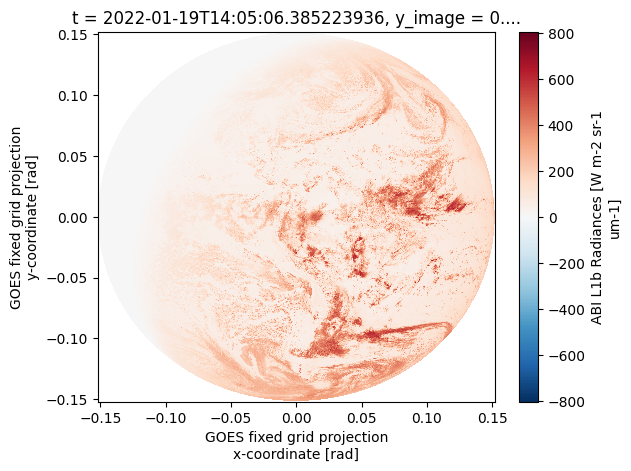

In [12]:
GOES_data.Rad.plot()

In [22]:
MODIS_path = "/css/modis/Collection6.1/L1/MOD021KM/2022/019/MOD021KM.A2022019.1445.061.2022020095153.hdf"

In [134]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import xarray as xr
import rioxarray as rxr
import rasterio
from shapely.geometry import mapping, box
import geopandas as gpd
#import earthpy as et
#import earthpy.spatial as es
#import earthpy.plot as ep

from osgeo import gdal
import matplotlib.pyplot as plt

xr.set_options(display_style='html')

In [69]:
xda = xr.DataArray(1)
xda.rio.write_crs(4326, inplace=True)
xda.spatial_ref

<xarray.DataArray 'spatial_ref' ()> Size: 8B
array(0)
Coordinates:
    spatial_ref  int64 8B 0
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    horizontal_datum_name:        World Geodetic System 1984
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...

In [50]:
def get_subdataset(file, varnames):
    g = gdal.Open(path)
    subdatasets = g.GetSubDatasets()
    print([s[0].split(':')[-1] for s in subdatasets])
    l = []
    for varname in varnames:
        print(varname)
        l.extend(  [s[0] for s in subdatasets if varname in s[0].split(':')[-1]  ])
        print(l)
    return l

In [75]:
def read_hdf4(file, varnames):
    ld = []
    fname_list = get_subdataset(file, varnames)
    for fname in fname_list:
        myDataset = xr.open_dataset(fname, decode_coords="all", engine='rasterio')#xr.open_rasterio(fname)
        ld.append(myDataset.to_dataset(name=fname.split(':')[-1]))
    return xr.merge(ld)

In [47]:
varnames = ['EV_1KM_RefSB']

In [76]:
path = MODIS_path
dset = read_hdf4(path, varnames)

['EV_1KM_RefSB', 'EV_1KM_RefSB_Uncert_Indexes', 'EV_1KM_Emissive', 'EV_1KM_Emissive_Uncert_Indexes', 'EV_250_Aggr1km_RefSB', 'EV_250_Aggr1km_RefSB_Uncert_Indexes', 'EV_250_Aggr1km_RefSB_Samples_Used', 'EV_500_Aggr1km_RefSB', 'EV_500_Aggr1km_RefSB_Uncert_Indexes', 'EV_500_Aggr1km_RefSB_Samples_Used', 'Height', 'SensorZenith', 'SensorAzimuth', 'Range', 'SolarZenith', 'SolarAzimuth', 'gflags', 'EV_Band26', 'EV_Band26_Uncert_Indexes']
EV_1KM_RefSB
['HDF4_EOS:EOS_SWATH:"/css/modis/Collection6.1/L1/MOD021KM/2022/019/MOD021KM.A2022019.1445.061.2022020095153.hdf":MODIS_SWATH_Type_L1B:EV_1KM_RefSB', 'HDF4_EOS:EOS_SWATH:"/css/modis/Collection6.1/L1/MOD021KM/2022/019/MOD021KM.A2022019.1445.061.2022020095153.hdf":MODIS_SWATH_Type_L1B:EV_1KM_RefSB_Uncert_Indexes']


TypeError: open_dataset() got an unexpected keyword argument 'decode_coords'

'HDF4_EOS:EOS_SWATH:"/css/modis/Collection6.1/L1/MOD021KM/2022/019/MOD021KM.A2022019.1445.061.2022020095153.hdf":MODIS_SWATH_Type_L1B:EV_250_Aggr1km_RefSB'

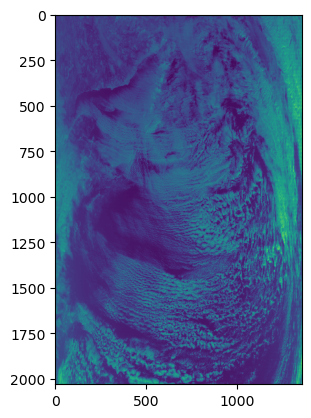

In [135]:
ds0 = gdal.Open(path)

band_ds = gdal.Open(ds0.GetSubDatasets()[0][0], gdal.GA_ReadOnly)
band_array = band_ds.ReadAsArray().astype(np.int16)
band_array
band_ds.GetDescription()
band_array.shape
plt.imshow(band_array[0,:,:], cmap='viridis')

In [140]:

band_ds = gdal.Open(ds0.GetSubDatasets()[4][0], gdal.GA_ReadOnly)
band_array = band_ds.ReadAsArray().astype(np.int16)
band_ds.GetDescription()

'HDF4_EOS:EOS_SWATH:"/css/modis/Collection6.1/L1/MOD021KM/2022/019/MOD021KM.A2022019.1445.061.2022020095153.hdf":MODIS_SWATH_Type_L1B:EV_250_Aggr1km_RefSB'

In [ ]:
## waiting for permission to access correspondong MOD03 files
